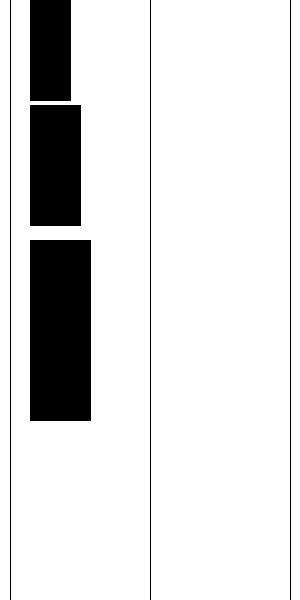

In [23]:
from PIL import Image, ImageDraw, ImageFont

# Create a new blank image (width, height), color: white
image = Image.new('RGB', (300, 600), color='white')

# Create an ImageDraw object to draw on the image
draw = ImageDraw.Draw(image)

# draw a horizontal line straight through the middle of the image
draw.line((150, 0, 150, 600), fill='black')

draw.line((10, 0, 10, 600), fill='black')
draw.line((290, 0, 290, 600), fill='black')

# Car
draw.rectangle((30,0, 30+40, 0 + 100), fill='black')

# Jeep
draw.rectangle((30,105, 30+50, 105 + 120), fill='black')

# Truck 
draw.rectangle((30,240, 30+60, 240 + 180), fill='black')

display(image)

Lets define vehicles

1. Car around 40px across and 100px length
2. Small Truck or Jeep, 50px across and 120px length
3. Large Truck or Lorry, 50px across and 180px length

So there will be two parts to the streets, the left or the right. Left will have x values less than 240px and Right will have x values greater than 360 px, additionally curbs must be drawn at the corners of each side to detect edges and detect parking spaces

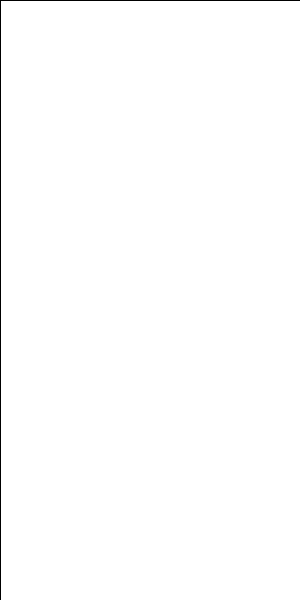

In [24]:
from PIL import Image, ImageDraw, ImageFont


VEHICLES = {
    'car': (40, 100),
    'jeep': (50, 120),
    'truck': (50, 180)
}

def createStreet(streetWidth, streetHeight, traffic, typesOfCars):
    image = Image.new('RGB', (streetWidth, streetHeight), color='white')

    draw = ImageDraw.Draw(image)

    draw.line((0, 0, streetWidth, 0), fill='black')
    draw.line((0, 0, 0, streetHeight), fill='black')
    draw.line((streetWidth, 0, streetWidth, streetHeight), fill='black')
    draw.line((0, streetHeight, streetWidth, streetHeight), fill='black')

    draw.line((0, 0, 0, streetHeight), fill='black')
    draw.line((streetWidth, 0, streetWidth, streetHeight), fill='black')

    return image
display(createStreet(300, 600, 0.5, VEHICLES))

In [49]:
from PIL import Image, ImageDraw, ImageFont
import random

PROTUDE = 10
CAR_LENGTH = 100
VEHICLES = {
    'car': (40, 100),
    'jeep': (50, 120),
    'truck': (50, 180)
}

def fillLane(image , draw, lane, traffic, vehicles):
    i = 30
    while i < image.height:
        if traffic > random.random():
            vehicle = random.choice(list(vehicles.keys()))
            vw, vh = vehicles[vehicle][0], vehicles[vehicle][1]

            if lane == 'left':
                draw.rectangle((PROTUDE + 5, i, PROTUDE +5 + vw, i + vh), fill = 'black')
            else:
                draw.rectangle((image.width - (PROTUDE + 5+ vw), i, image.width - (PROTUDE+5 ), i + vh), fill = 'black')

            i+=vh+5
        else:
            i+=CAR_LENGTH

    pass


def createStreet(streetWidth, streetHeight, traffic, vehicles):
    image = Image.new('RGB', (streetWidth, streetHeight), color='white')

    draw = ImageDraw.Draw(image)

    # Draw the curbs
    draw.line((PROTUDE, 0, PROTUDE, streetHeight), fill='black')
    draw.line((streetWidth - PROTUDE, 0, streetWidth - PROTUDE, streetHeight), fill='black')

    # Draw the middle lane marking
    draw.line((streetWidth//2, 0, streetWidth//2, streetHeight), fill='black')

    # Fill left lane
    fillLane(image, draw, 'left', traffic, vehicles)
    # Fill right lane
    fillLane(image, draw, 'right', traffic, vehicles)

    return image

street = createStreet(600, 800, 0.5
, VEHICLES)

street.save('street.png')